


# Simulación del Camino de un Fotón en tejido biológico (piel) 
> Terezza Marianne Gonzalez Jauregui

> Laura Belén Rodríguez Rodríguez

> Mariano Villanueva Aguilar

___
## 1. Introducción.
La interacción de la luz con la piel humana es un proceso complejo que involucra fenómenos de absorción, dispersión y reflexión, los cuales afectan la penetración y distribución de los fotones en las distintas capas cutáneas, como la epidermis y la dermis. Esta dinámica es clave tanto en estudios médicos como en el desarrollo de productos de protección solar, donde el uso de bloqueadores de SPF 50, por ejemplo, puede modificar considerablemente la absorción de la luz UV. En este proyecto, nos enfocamos en simular el camino de fotones al interactuar con la piel, explorando cómo distintos factores —como el nivel de SPF y las propiedades ópticas de la piel— alteran su absorción y dispersión, para comprender mejor la efectividad de estos productos en la protección cutánea.


### 2. Objetivos.

> #### 1. Objetivo general.
>  Simular y analizar la absorción y dispersión de fotones en la piel humana, evaluando cómo influyen distintos factores, como la aplicación de bloqueadores solares, en la penetración de luz en la capa cutánea 
> #### 1.1 Objetivos específicos
> Modelar la trayectoria de fotones en la piel a través de simulaciones que consideren las propiedades de absorción y dispersión de la epidermis.

> Evaluar la importancia y beneficio de un bloqueador solar, observando el cambio en la penetración y absorción de fotones en presencia de este protector.

> Analizar las trayectorias de fotones que alcanzan diferentes profundidades en la piel para determinar el riesgo de daño por radiación en función de la absorción.


### 2.1 Modelo que representa el problema.
> Simulación del trayecto de cada fotón al interactuar con partículas de la piel, tomando en cuenta parámetros como la absorción (mu_a) y dispersión (mu_s).
> Cálculo del cambio de posición de cada fotón usando los ángulos de dispersión theta y phi

> Este método es adecuado para simular fenómenos aleatorios complejos, como el comportamiento de la luz en medios no homogéneos, porque permite observar el comportamiento estadístico de muchas partículas.

> Este modelo representa cómo los fotones de la luz penetran y se comportan en la piel humana, tomando en cuenta las interacciones de absorción y dispersión, tanto en condiciones normales como bajo la aplicación de protector solar, una limitación es que se basa en simplificaciones, ya que el modelo no considera la compleja estructura multicapa de la piel y asume una dispersión y absorción homogénea en toda el área. Además, no toma en cuenta otros factores como la longitud de onda específica de la luz.

> mu_a (Coeficiente de absorción): Representa la probabilidad de que un fotón sea absorbido en cada paso. En este caso, simula el porcentaje de absorción en la epidermis.

> mu_s (Coeficiente de dispersión): Controla la dispersión angular de cada fotón al interactuar con partículas en la piel. Se usa una probabilidad aleatoria para representar variabilidad natural.

> N (Número de fotones): El número de fotones simulados, que permite obtener una muestra estadísticamente significativa de la trayectoria de los fotones en la piel.

> num_pasos (Pasos de la simulación): Define cuántas interacciones se simulan para cada fotón antes de que salga de la piel o se absorba.

### 2.2 Solución del problema de optimización.





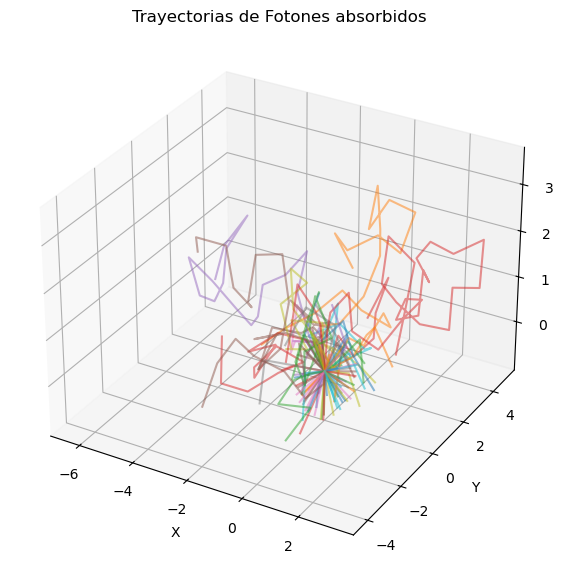

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del tejido
mu_a = 0.9  # Porcentaje de absorción de un foton en la piel, capa epidermis
N = 100  # Fotones a simular
num_pasos = 10000

def camino_foton():
    x, y, z = 0, 0, 0
    trayectoria = [(x, y, z)]
    
    for i in range(num_pasos):
        theta = np.arccos(2 * np.random.rand() - 1)
        phi = 2 * np.pi * np.random.rand()
        
        dx = np.sin(theta) * np.cos(phi)
        dy = np.sin(theta) * np.sin(phi)
        dz = np.cos(theta)
        
        # Aplicar absorción
        m_abs=np.random.choice([0,1],p=[0.10,0.90])
        if m_abs==0:
            break
            
        
        x += dx
        y += dy
        z += dz
        trayectoria.append((x, y, z))
        
        if z < 0:
            break
    
    return np.array(trayectoria)

# Simulación y visualización
trayectorias = [camino_foton() for _ in range(N)]
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

for trayectoria in trayectorias:
    x = [punto[0] for punto in trayectoria]  
    y = [punto[1] for punto in trayectoria]  
    z = [punto[2] for punto in trayectoria]  
    ax.plot(x, y, z, alpha=0.5)

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.title("Trayectorias de Fotones absorbidos")
plt.show()

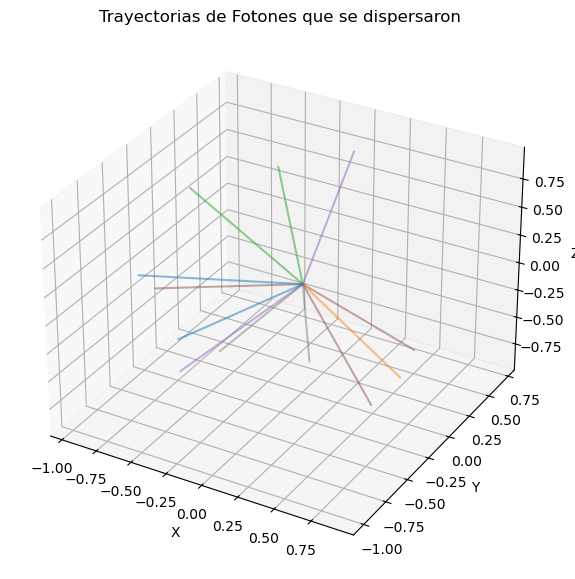

array([[0, 0, 0]])

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del tejido
mu_a = 0.9  # Porcentaje de absorción de un foton en la piel, capa epidermis
N = 100  # Fotones a simular
num_pasos = 10000

def camino_foton():
    x, y, z = 0, 0, 0
    trayectoria = [(x, y, z)]
    
    for i in range(num_pasos):
        mu_s=np.random.choice([0.70,0.90])# Promedio de porcentaje de dispersión de un fotón en la epidermis
        theta = np.arccos(2 * np.random.rand() - 1)
        phi = 2 * np.pi * np.random.rand()
        
        dx = np.sin(theta) * np.cos(phi)
        dy = np.sin(theta) * np.sin(phi)
        dz = np.cos(theta)
        
        # Aplicar absorción
        m_abs=np.random.choice([0,1],p=[0.10,0.90])
        if m_abs==1:
            break
            
        
        x += dx
        y += dy
        z += dz
        trayectoria.append((x, y, z))
        
        if z < 0:
            break
    
    return np.array(trayectoria)

# Simulación y visualización
trayectorias = [camino_foton() for i in range(N)]
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

for trayectoria in trayectorias:
    x = [punto[0] for punto in trayectoria]  
    y = [punto[1] for punto in trayectoria]  
    z = [punto[2] for punto in trayectoria]  
    ax.plot(x, y, z, alpha=0.5)

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.title("Trayectorias de Fotones que se dispersaron")
plt.show()
trayectoria

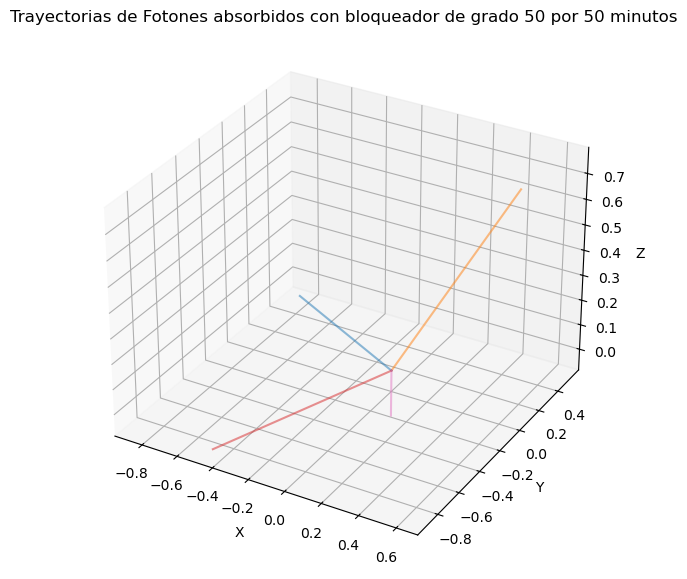

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del tejido
mu_a = 0.9  # Porcentaje de absorción de un foton en la piel, capa epidermis
N = 100  # Fotones a simular
num_pasos = 10000

def camino_foton():
    x, y, z = 0, 0, 0
    trayectoria = [(x, y, z)]
    
    for i in range(num_pasos):
        theta = np.arccos(2 * np.random.rand() - 1)
        phi = 2 * np.pi * np.random.rand()
        
        dx = np.sin(theta) * np.cos(phi)
        dy = np.sin(theta) * np.sin(phi)
        dz = np.cos(theta)
        
        # Aplicar absorción
        m_abs=np.random.choice([0,1],p=[0.02,0.98])
        if m_abs==1:
            break
            
        
        x += dx
        y += dy
        z += dz
        trayectoria.append((x, y, z))
        
        if z < 0:
            break
    
    return np.array(trayectoria)

# Simulación y visualización
trayectorias = [camino_foton() for _ in range(N)]
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

for trayectoria in trayectorias:
    x = [punto[0] for punto in trayectoria]  
    y = [punto[1] for punto in trayectoria]  
    z = [punto[2] for punto in trayectoria]  
    ax.plot(x, y, z, alpha=0.5)

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.title("Trayectorias de Fotones absorbidos con bloqueador de grado 50 por 50 minutos")
plt.show()

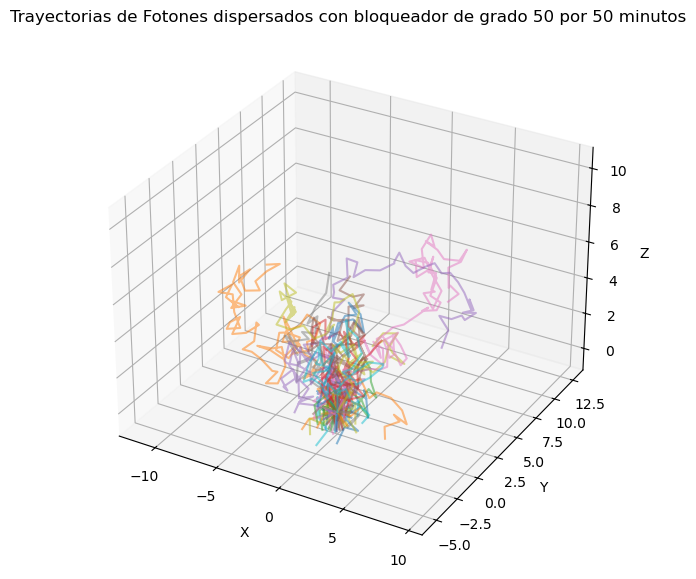

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del tejido
mu_a = 0.9  # Porcentaje de absorción de un foton en la piel, capa epidermis
N = 100  # Fotones a simular
num_pasos = 10000

def camino_foton():
    x, y, z = 0, 0, 0
    trayectoria = [(x, y, z)]
    
    for i in range(num_pasos):
        theta = np.arccos(2 * np.random.rand() - 1)
        phi = 2 * np.pi * np.random.rand()
        
        dx = np.sin(theta) * np.cos(phi)
        dy = np.sin(theta) * np.sin(phi)
        dz = np.cos(theta)
        
        # Aplicar absorción
        m_abs=np.random.choice([0,1],p=[0.02,0.98])
        if m_abs==0:
            break
            
        
        x += dx
        y += dy
        z += dz
        trayectoria.append((x, y, z))
        
        if z < 0:
            break
    
    return np.array(trayectoria)

# Simulación y visualización
trayectorias = [camino_foton() for _ in range(N)]
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

for trayectoria in trayectorias:
    x = [punto[0] for punto in trayectoria]  
    y = [punto[1] for punto in trayectoria]  
    z = [punto[2] for punto in trayectoria]  
    ax.plot(x, y, z, alpha=0.5)

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.title("Trayectorias de Fotones dispersados con bloqueador de grado 50 por 50 minutos")
plt.show()

### 2.6 Conclusiones.
> La simulación ofrece una perspectiva valiosa sobre cómo la luz interactúa con la piel humana. Este fenómeno es crucial para entender y analizar no solo las propiedades ópticas de la piel (como la absorción, dispersión y el uso de bloqueador solar influyen en el comportamiento de los fotones), sino también las implicaciones que tiene la salud de la piel y la prevención de enfermedades cutáneas, como el cáncer de piel.
El uso de bloqueador solar, tal como se observó en las simulaciones, reduce significativamente la absorción de fotones por la piel, minimizando los daños ocasionados por la radiación ultravioleta (UV). Esto resalta la importancia del uso adecuado de protectores solares para mitigar y prevenir el impacto de los rayos UV, que son un factor de riesgo importante en el desarrollo de melanomas y otras afecciones cutáneas, incluyendo cáncer de piel. 
Comprender cómo la luz interactúa con la piel y cómo los productos protectores modifican esta interacción puede ser clave para desarrollar mejores estrategias de protección y para la educación sobre el cuidado de la salud cutánea. Mejorando el código para hacerlo más preciso, explorando otros factores que influyen en la interacción luz-tejido, como el grosor de las capas dérmicas, la presencia de melanina, o incluso condiciones ambientales como la humedad y temperatura.


### 2.7 Referencias.
> Narea, F., Vivas, S., & Muñoz, A. (2015). Recuperación del coeficiente de absorción de la epidermis en la piel humana. Retrieving the absorbtion coeffcicient of epidermis in human skin. Opt. Pura y Apl, 48(3), 207-214.
Padilla, H. C. FOTODERMATOSIS.

> Cantú-Rodríguez, J. M., Montes-Tapia, F., Cura-Esquivel, I., Cervantes-García, O., & Puente, N. P. (2017, September). Modelado numérico para detectar ópticamente parámetros de la piel. In Memorias del Congreso Nacional de Ingeniería Biomédica (Vol. 4, No. 1, pp. 126-129).